In [103]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
def load_data(directory, file_name, names=None, header=None, skiprows=0):
    return pd.read_excel(os.path.join(directory, file_name), names=names, header=header, skiprows=skiprows, skipinitialspace=True)

In [124]:
def load_csv_data(directory, file_name, names=None, header=None, skiprows=0, skipinitialspace=True):
    return pd.read_csv(os.path.join(directory, file_name), names=names, header=header, skiprows=skiprows, skipinitialspace=skipinitialspace)

In [3]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [4]:
def scoring_using_cross_validation(m, x, y, s='accuracy'):
    print("************* Start of Cross Validation {} {} *************".format(s, m))
    scores_ = cross_val_score(m, x, y, scoring="accuracy", cv=10)
    rmse_scores_ = np.sqrt(scores_)
    display_scores(rmse_scores_)
    print("************* End of Cross Validation {} {}*************".format(s, m))


def print_scores(m, Y_test, Y_predictions):
    print("************* {} *************".format(m))
    mse_ = mean_squared_error(Y_test, Y_predictions)
    print("mse ", mse_)
    acc_ = accuracy_score(Y_test, Y_predictions)
    print("acc ", acc_)
    print("****************************************")


In [19]:
base_directory = '~/workspace/personal/datasets/DryBeanDataset'

columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 
           'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
           'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [17]:
dry_bean_df = pd.read_excel(os.path.join(base_directory, 'Dry_Bean_Dataset.xlsx'))
print(list(dry_bean_df))

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


In [20]:
split = ShuffleSplit(test_size=0.20, random_state=1)
train_index, test_index = list(split.split(dry_bean_df[columns]))[0]

In [27]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

ct = ColumnTransformer([
        ("norm2", num_pipeline, columns)
], remainder='passthrough')

lb = LabelEncoder()

X_train_set = dry_bean_df.loc[train_index].drop(['Class'], axis=1)
X_test_set = dry_bean_df.loc[test_index].drop(['Class'], axis=1)

Y_train_set = dry_bean_df['Class'].copy().loc[train_index]
Y_test_set = dry_bean_df['Class'].copy().loc[test_index]

In [28]:
X_train = ct.fit_transform(X_train_set)
Y_train = lb.fit_transform(Y_train_set)

X_test = ct.transform(X_train_set)
Y_test = lb.transform(Y_train_set)

In [82]:
def evaluate_model(model):
    Y_predictions = model.predict(X_test)
    precision_ = precision_score(Y_test, Y_predictions, average='weighted')
    print("precision_ ", precision_)
    recall_ = recall_score(Y_test, Y_predictions, average='weighted')
    print("recall_ ", recall_)
    f1_score_ = f1_score(Y_test, Y_predictions, average='weighted')
    print("f1_score_ ", f1_score_)
    if hasattr(model, 'decision_function'):
        scores_ = model.decision_function(X_test[:5, :])
        print("Decision Function Results {}".format(scores_))
        print(lb.inverse_transform(Y_test[:5]))
    return Y_predictions


In [104]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, Y_train)
Y_predictions = evaluate_model(sgd_clf)

precision_  0.9150990475154602
recall_  0.9137582659808964
f1_score_  0.9137069347280099
Decision Function Results [[   0.35935994  -77.1057229    -4.75110586  -16.15256736   -2.32458458
    -8.50768778   -4.80458148]
 [  -5.41709825 -112.17509678   -9.61533756    0.37852355   -7.54384867
    -3.23584812   -0.42928032]
 [  -7.04701634 -116.10686166  -13.36605446    1.3608991    -9.85650559
    -3.22416227   -2.41552107]
 [   2.04234109  -35.78549791   -3.6892864   -24.17449555  -13.39119097
   -10.695282    -15.58729535]
 [  -4.98795816  -75.31283029    1.36382221  -13.79755781   -2.27776958
   -12.81564564   -2.80736263]]
['BARBUNYA' 'SIRA' 'SIRA' 'BARBUNYA' 'CALI']


### Cross Validate with decision function

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
[0 1 2 3 4 5 6]
[[ 873    0  104    0    5    8   62]
 [   1  418    0    0    0    0    0]
 [   7    0 1236    0   16    2   36]
 [   1    0    0 2633    4   61  142]
 [   1    0   29   17 1446    0   49]
 [  12    0    0   20    1 1540   49]
 [   2    0    5  240   26   39 1803]]


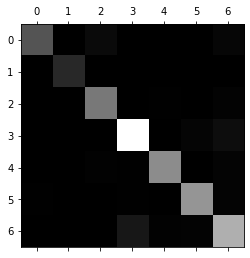

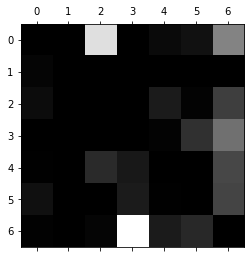

In [106]:
from sklearn.metrics import confusion_matrix

y_scores_ = cross_val_predict(sgd_clf, X_train, Y_train, cv=3, method="decision_function")
conf_mx = confusion_matrix(Y_train, Y_predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(lb.classes_)
print(lb.transform(lb.classes_))
print(conf_mx)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [114]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
Y_predictions = evaluate_model(dt_clf)

precision_  1.0
recall_  1.0
f1_score_  1.0


In [136]:
X_test = ct.fit_transform(test_data_set.drop(["Class"], axis=1))
Y_test = lb.transform(test_data_set["Class"].copy())

precision_  0.9683371145641395
recall_  0.968334435383146
f1_score_  0.968331315958956
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
[0 1 2 3 4 5 6]
[[1282    0   25    2    5    1    7]
 [   0  522    0    0    0    0    0]
 [  31    0 1579    0   11    2    7]
 [   1    0    0 3449    3   18   75]
 [   4    0   13    7 1880    0   24]
 [   3    0    3   15    0 1988   18]
 [   8    0    4   83   21   27 2493]]


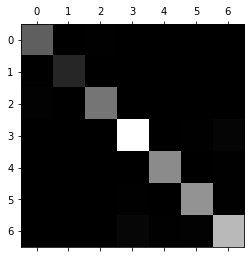

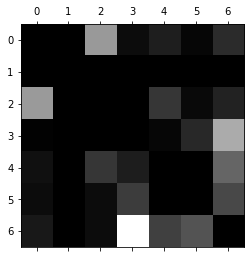

In [138]:
Y_predictions = dt_clf.predict(X_test)
evaluate_model(dt_clf)
conf_mx = confusion_matrix(Y_test, Y_predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(lb.classes_)
print(lb.transform(lb.classes_))
print(conf_mx)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

precision_  0.9822399728510085
recall_  0.9822202630225553
f1_score_  0.9822181871962332
precision_  0.9707916081281314
recall_  0.9707589449709794
f1_score_  0.9707691177119021
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
[0 1 2 3 4 5 6]
[[1284    0   24    1    3    2    8]
 [   0  522    0    0    0    0    0]
 [  36    0 1579    0    9    1    5]
 [   1    0    0 3445    4   17   79]
 [   3    0   16    6 1878    0   25]
 [   2    0    2   17    0 1983   23]
 [   8    0    2   86   23   28 2489]]


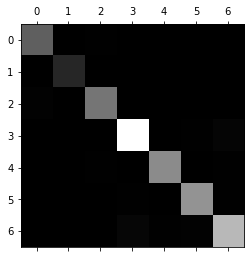

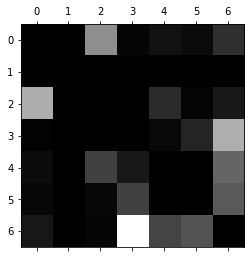

In [139]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
Y_predictions = evaluate_model(rf_clf)

Y_predictions = dt_clf.predict(X_test)
evaluate_model(dt_clf)
conf_mx = confusion_matrix(Y_test, Y_predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(lb.classes_)
print(lb.transform(lb.classes_))
print(conf_mx)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)